# IMDb Dataset EDA

## Initial Look

In [1]:
# Import neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tools.plotting import table

In [2]:
# Import movies table and set the index
movies = pd.read_csv('data/movies0.csv')
movies.set_index('tconst', inplace=True)

Let's take a first look at out movies table:

In [3]:
movies.head(3)

,primaryTitle,startYear,runtimeMinutes,genres,directors,writers,averageRating,numVotes,plot,plot outlines,keywords,synopsis
tconst,,,,,,,,,,,,
tt0111161,The Shawshank Redemption,1994,142,Drama,nm0001104,"nm0000175,nm0001104",9.3,2057323,Two imprisoned men bond over a number of years...,Chronicles the experiences of a formerly succe...,"wrongful-imprisonment,escape-from-prison,based...","In 1947, Andy Dufresne (Tim Robbins), a banker..."
tt0468569,The Dark Knight,2008,152,"Action,Crime,Drama",nm0634240,"nm0634300,nm0634240,nm0333060,nm0004170",9.0,2023734,When the menace known as the Joker emerges fro...,Set within a year after the events of Batman B...,"dc-comics,moral-dilemma,psychopath,clown,scarr...",The movie begins with a gang of men with clown...
tt1375666,Inception,2010,148,"Action,Adventure,Sci-Fi",nm0634240,nm0634240,8.8,1802989,A thief who steals corporate secrets through t...,"Dom Cobb is a skilled thief, the absolute best...","dream,subconscious,ambiguous-ending,thief,psyc...","A young man, exhausted and delirious, washes u..."


We see that numVotes has large numbers, but it's hard to tell if the numVotes is in the millions, hundreds of thousands, etc. Let's format that column better.

In [4]:
movies['numVotes'] = movies.apply(lambda x: "{:,}".format(x['numVotes']), axis=1)

We don't need the directors or writers columns, so let's get rid of them. Including them in our model would increase the dimensionality of our feature set massively, and we want to avoid that.

In [5]:
movies.drop(labels=['directors', 'writers'], axis='columns', inplace=True) 

In [6]:
movies.head(3)

,primaryTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,plot,plot outlines,keywords,synopsis
tconst,,,,,,,,,,
tt0111161,The Shawshank Redemption,1994,142,Drama,9.3,"2,057,323",Two imprisoned men bond over a number of years...,Chronicles the experiences of a formerly succe...,"wrongful-imprisonment,escape-from-prison,based...","In 1947, Andy Dufresne (Tim Robbins), a banker..."
tt0468569,The Dark Knight,2008,152,"Action,Crime,Drama",9.0,"2,023,734",When the menace known as the Joker emerges fro...,Set within a year after the events of Batman B...,"dc-comics,moral-dilemma,psychopath,clown,scarr...",The movie begins with a gang of men with clown...
tt1375666,Inception,2010,148,"Action,Adventure,Sci-Fi",8.8,"1,802,989",A thief who steals corporate secrets through t...,"Dom Cobb is a skilled thief, the absolute best...","dream,subconscious,ambiguous-ending,thief,psyc...","A young man, exhausted and delirious, washes u..."


Great stuff. 

Let's look at all the column types

In [7]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, tt0111161 to tt0110365
Data columns (total 10 columns):
primaryTitle      10000 non-null object
startYear         10000 non-null int64
runtimeMinutes    10000 non-null int64
genres            10000 non-null object
averageRating     10000 non-null float64
numVotes          10000 non-null object
plot              10000 non-null object
plot outlines     9427 non-null object
keywords          9877 non-null object
synopsis          6059 non-null object
dtypes: float64(1), int64(2), object(7)
memory usage: 859.4+ KB


We see we are missing some plot outlines and plot keywords and a **lot** of plot synopses. What we can do for the plot outlines is fill the missing values with the values from plot. For keywords, it's not clear how best to handle that scenario, so we'll just leave it blank for now. Ditto for synopsis.

In [8]:
movies.loc[movies['plot outlines'].isnull(),'plot outlines'] = movies.loc[movies['plot outlines'].isnull(),'plot']

In [9]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, tt0111161 to tt0110365
Data columns (total 10 columns):
primaryTitle      10000 non-null object
startYear         10000 non-null int64
runtimeMinutes    10000 non-null int64
genres            10000 non-null object
averageRating     10000 non-null float64
numVotes          10000 non-null object
plot              10000 non-null object
plot outlines     10000 non-null object
keywords          9877 non-null object
synopsis          6059 non-null object
dtypes: float64(1), int64(2), object(7)
memory usage: 1.2+ MB


Great, it worked. We can't do the same for the keywords column, so we'll leave it alone for now. Let's get some numerical statistics.

## Examining Features

### Numeric Features: startYear, runtimeMinutes, averageRating, and numVotes

#### Individually

In [10]:
movies.describe()

,startYear,runtimeMinutes,averageRating
count,10000.00000,10000.000000,10000.000000
mean,1998.73320,108.832700,6.655770
std,18.01907,22.337511,1.043811
min,1915.00000,45.000000,1.300000
25%,1992.00000,94.000000,6.100000
50%,2004.00000,105.000000,6.800000
75%,2012.00000,118.000000,7.400000
max,2019.00000,566.000000,9.700000


We see that pandas thinks startYear is a float, which is fine. We see that the earliest movie in our set is from 1915, the latest is from 2019 and about half the movies are before and after 2004. The mean, though, is about 1999 indicating that the movies before 2004 are more spread out which makes sense.

In terms of runtime, not much to say. The median is 105 minutes or an hour and 45 minutes, and the mean is very close.

The mean movie rating is about 6.7 stars. The meadian is 6.8 so about that same. The ratings range from 1.3 to 9.7 stars.

Why isn't numVotes here? Looking above, we see because it's an object. Let's deal with that.

In [11]:
movies['numVotes'] = movies.apply(lambda x: int((x['numVotes']).replace(',', '')), axis=1)

In [12]:
movies.describe()

,startYear,runtimeMinutes,averageRating,numVotes
count,10000.00000,10000.000000,10000.000000,1.000000e+04
mean,1998.73320,108.832700,6.655770,6.658774e+04
std,18.01907,22.337511,1.043811,1.277254e+05
min,1915.00000,45.000000,1.300000,6.554000e+03
25%,1992.00000,94.000000,6.100000,1.103175e+04
50%,2004.00000,105.000000,6.800000,2.238150e+04
75%,2012.00000,118.000000,7.400000,6.455650e+04
max,2019.00000,566.000000,9.700000,2.057323e+06


In [13]:
# ax = plt.subplot(111, frame_on=False) #no visible frame
# ax.xaxis.set_visible(False) # hide the x axis
# ax.yaxis.set_visible(False) #hide the y axis

# table(ax, numeric_summary) 

# plt.savefig('numeric_summary.png')

Cool, it worked. We see that the mean number of votes for a movie is about 66.5 thousand. The standard deviation is almost double that though indicating most movis are below the mean, and a few are **way** above it. This can also be seen from the fact that the 75th percentile is smaller than the mean.

These descriptions can be better understood with some plotting.

First, let's define a function that will help with much of the plotting:

In [14]:
def plot_numeric(name, bins):
    sns.set()
    ax = name.hist(bins=bins, grid=False)
    ax.set_xlabel(name.name)
    ax.set_ylabel('count')
    plt.show()
    fig = ax.get_figure()
    fig.savefig(str(name.name) + '.png')

##### startYear

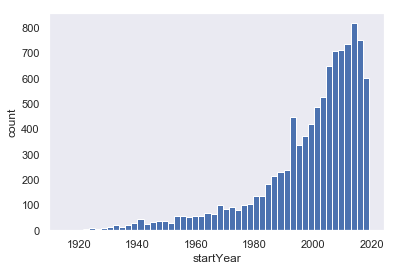

In [15]:
plot_numeric(movies.startYear, bins=50)

We see that the number of movies made goes up with time, unsurprisingly. The reason for the dip at the end would be because we are only at the beginning of 2019, so many movies have yet to be released. We also see a distinct bump around 1990. It's worth checking out.

##### runtimeMinutes

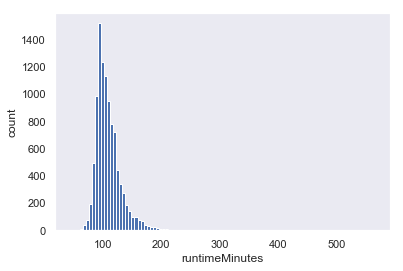

In [16]:
plot_numeric(movies.runtimeMinutes, bins=100)

OK, we see that the vast majority of movies are clustered around 100 minutes. Very few exceed 200 minutes, which is over 3 hours. Let's take a look at those that do.

In [17]:
movies.loc[movies.runtimeMinutes>200].shape

(34, 10)

34 such movies. My guess is that they would be disproportionately documentaries

In [18]:
movies.loc[movies.runtimeMinutes>200]

,primaryTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,plot,plot outlines,keywords,synopsis
tconst,,,,,,,,,,
tt0167260,The Lord of the Rings: The Return of the King,2003,201,"Adventure,Drama,Fantasy",8.9,1464810,Gandalf and Aragorn lead the World of Men agai...,The final confrontation between the forces of ...,"orc,battle,journey,hobbit,ring,middle-earth,ki...","In the opening scene, a flashback, two hobbits..."
tt0071562,The Godfather: Part II,1974,202,"Crime,Drama",9.0,978878,The early life and career of Vito Corleone in ...,The continuing saga of the Corleone crime fami...,"revenge,corrupt-politician,bloody-body-of-chil...",The Godfather Part II presents two parallel st...
tt0047478,Seven Samurai,1954,207,"Adventure,Drama",8.7,278097,A poor village under attack by bandits recruit...,"A veteran samurai, who has fallen on hard time...","samurai,battle,village,bandit,farmer,rice,vill...",A gang of marauding bandits approaches a mount...
tt0087843,Once Upon a Time in America,1984,229,"Crime,Drama",8.4,271739,A former Prohibition-era Jewish gangster retur...,Epic tale of a group of Jewish gangsters in Ne...,"doggystyle-sex,white-panties,topless-female-nu...",The story is divided among three distinct time...
tt0031381,Gone with the Wind,1939,238,"Drama,History,Romance",8.2,260384,A manipulative woman and a roguish man conduct...,Scarlett is a woman who can deal with a nation...,"mammy,american-civil-war,narcissistic-personal...","The film opens in Tara, a cotton plantation ow..."
tt0056172,Lawrence of Arabia,1962,216,"Adventure,Biography,Drama",8.3,237626,"The story of T.E. Lawrence, the English office...",Due to his knowledge of the native Bedouin tri...,"ottoman-empire,british-military,arab,desert,ca...","In 1935, T. E. Lawrence (Peter O'Toole) is kil..."
tt0052618,Ben-Hur,1959,212,"Adventure,Drama,History",8.1,198631,When a Jewish prince is betrayed and sent into...,Judah Ben-Hur lives as a rich Jewish prince an...,"roman-empire,homoerotic-subtext,false-accusati...",Judah Ben-Hur (Charlton Heston) is a wealthy m...
tt0169102,Lagaan: Once Upon a Time in India,2001,224,"Adventure,Drama,Musical",8.1,91353,The people of a small village in Victorian Ind...,This is the story about the resilience shown b...,"british,based-on-supposedly-true-story,cricket...",NaN
tt0104797,Malcolm X,1992,202,"Biography,Drama,History",7.7,74709,Biographical epic of the controversial and inf...,"Biograpical epic of Malcolm X, the legendary A...","islam,nation-of-islam,ku-klux-klan,african-ame...","As the opening credits roll, we hear Malcolm X..."


Hard to tell at a glance. We need to wait until we process the genres column to make any such statements.

##### averageRating	

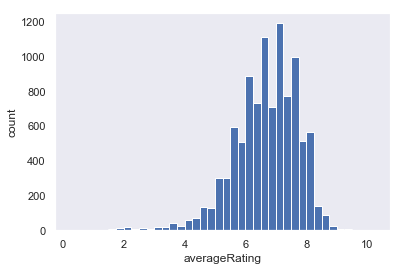

In [19]:
plot_numeric(movies.averageRating, bins=np.arange(0.25,10.5, 0.25))

We see most movies fall between 6 and 8 stars.

#### numVotes

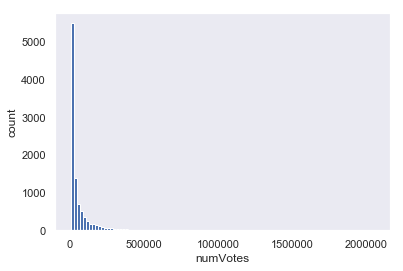

In [20]:
plot_numeric(movies.numVotes, bins=100)

Wow, this distribution is very right-skewed. Let's see how many movies have more than 500,000 votes.

In [21]:
movies.loc[movies.numVotes>500000].shape

(178, 10)

Only 178. These must be the greats.

In [22]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, tt0111161 to tt0110365
Data columns (total 10 columns):
primaryTitle      10000 non-null object
startYear         10000 non-null int64
runtimeMinutes    10000 non-null int64
genres            10000 non-null object
averageRating     10000 non-null float64
numVotes          10000 non-null int64
plot              10000 non-null object
plot outlines     10000 non-null object
keywords          9877 non-null object
synopsis          6059 non-null object
dtypes: float64(1), int64(3), object(6)
memory usage: 1.2+ MB


#### 2 Features at a Time

First, let's take a look at the correlations between our numeric features.

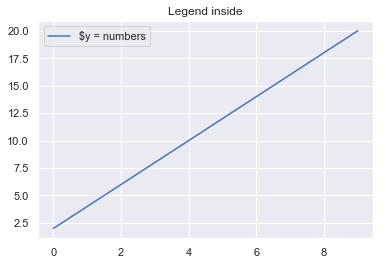

In [23]:
y = [2,4,6,8,10,12,14,16,18,20]
x = np.arange(10)
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(x, y, label='$y = numbers')
plt.title('Legend inside')
ax.legend()
#plt.show()
 
fig.savefig('plot.png')

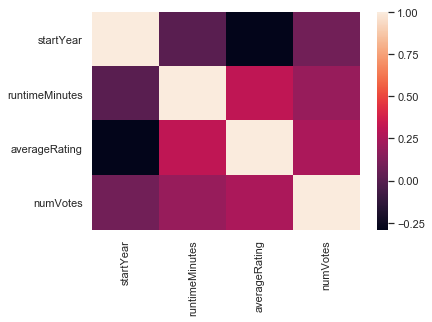

In [24]:
fig = plt.figure()
ax = plt.subplot(111)
corr = movies.corr()
ax = sns.heatmap(corr)
plt.show()
fig.savefig('heatmap.png')

#plt.savefig('heatmap.png')

We don't see any correlations that are too high. It looks like startYear and averageRating are negatively correlated, meaning more recent movies are more likely to be rated lower. Let's look at the numbers.

In [25]:
corr_triu = corr.where(~np.tril(np.ones(corr.shape)).astype(np.bool))
corr_triu = corr_triu.stack()
corr_triu.name = 'Pearson Correlation Coefficient'
corr_triu.index.names = ['Feature 1', 'Feature 2']

In [26]:
corr_triu.sort_values(ascending=False)

Feature 1       Feature 2     
runtimeMinutes  averageRating     0.314285
averageRating   numVotes          0.254650
runtimeMinutes  numVotes          0.196031
startYear       numVotes          0.083236
                runtimeMinutes    0.007503
                averageRating    -0.292108
Name: Pearson Correlation Coefficient, dtype: float64

We see some interesting numbers here. Let's investigate them with some graphs.

To that end, let's define a helpful plotting function first, that also outputs useful information:

In [27]:
from numpy.polynomial.polynomial import polyfit
sns.set()
def plot_features(x,y):
    plt.plot(x, y, '.')
    b,m = polyfit(x, y, 1)
    plt.plot(x, b +(m*x), '-', color='orange')
    #plt.plot(np.unique(x), np.poly1d(np.polyfit(x,y,1))(np.unique(x)), color='orange') #another way of plotting the line
    plt.xlabel(x.name)
    plt.ylabel(y.name)
    plt.show()
    print("The intercept for these points is: %s" %"{:,}".format(round(b,2)))
    print("The slope of these points is: %s" %"{:,}".format(round(m,2)))
    beginning_value = b + (m*np.unique(x)[0])
    end_value = b + (m*np.unique(x)[-1])
    print("The line ranges from %s in %.2f to %s in %.2f for a difference of %s" %("{:,}".format(round(beginning_value,2)), 
                                                                                   np.unique(x)[0], 
                                                          "{:,}".format(round(end_value,2)), 
                                                                                   np.unique(x)[-1], 
                                                          "{:,}".format(round(end_value - beginning_value,2))))
    print("Pearson Correlation between %s and %s: %f" %(x.name, y.name, x.corr(y)))
    #return b,m

##### startYear and runtimeMinutes

Let us examine if there is any relationship between these 2 variables. They are both integer valued, so let's try a scatter chart and overlay the line of best fit on top.

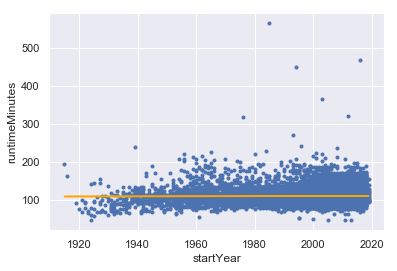

The intercept for these points is: 90.24
The slope of these points is: 0.01
The line ranges from 108.05 in 1915.00 to 109.02 in 2019.00 for a difference of 0.97
Pearson Correlation between startYear and runtimeMinutes: 0.007503


In [28]:
plot_features(movies.startYear, movies.runtimeMinutes)

The line seems pretty flat, so there doesn't seen to be much of a relationship. 

We are more interested in the slope here which is about 0.009. This means that for every year going forward from 1915 to 2019, movies get about 0.009 minutes longer or about 0.54 seconds longer. So it's not really significant. The intercept of about 90.24 means that if we were to extrapolate into the past, a movie made in the year 0 should be about 90 minutes long. The more useful starting point is in 1915, the year of the earliest movie in our dataset. We see that the values at 1915 of 108.05 and 109.02 in 2019 differ by less than a minutes. Finally, we see that the correlation between the 2 features is almost 0. So we can discard the relathionship here.

##### startYear and averageRating

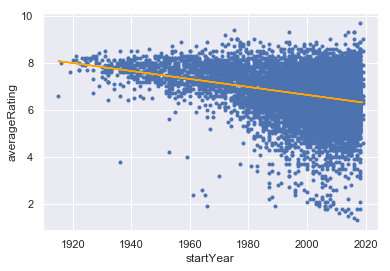

The intercept for these points is: 40.48
The slope of these points is: -0.02
The line ranges from 8.07 in 1915.00 to 6.31 in 2019.00 for a difference of -1.76
Pearson Correlation between startYear and averageRating: -0.292108


In [29]:
plot_features(movies.startYear, movies.averageRating)

Wow, definately seems to be a negative relationship here. With each passing year, the line says that a movie should get about 0.017 stars less than if it had been produced in the previous year. Over the time span we are dealing with, this translates to about 1.75 stars fewer in the end than in the beginning, a practically (as opposed to statistically) significant amount. We observe that the negative correlation backs this up as well. Finally, we see that a hypothetical movie made in year 0 could have been expected to get about 40 stars. Clearly a missed opportunity for those living at the time.

##### startYear and numVotes

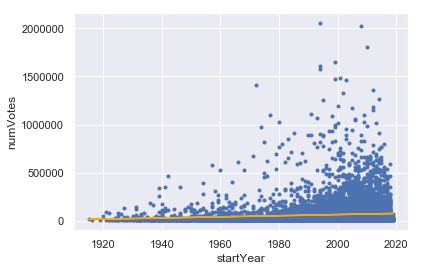

The intercept for these points is: -1,112,669.52
The slope of these points is: 590.0
The line ranges from 17,184.95 in 1915.00 to 78,545.2 in 2019.00 for a difference of 61,360.24
Pearson Correlation between startYear and numVotes: 0.083236


In [30]:
plot_features(movies.startYear, movies.numVotes)

OK, so we see a small correlation to start with, but one that is there. With every year that passes, a movie gets about 590 additional votes, and this translated to about 60,000 additional votes between movies made in 1915 and those made in 2019. What we do see however, is that the vast majority of movies in our dataset from recent times still receive comparitively few votes and that there are a few movies (i.e. 'the greats') that get a huge number of votes. So let's show this.

First, let's separate the movies into different decades.

In [31]:
movies['decade'] = movies['startYear'].apply(lambda x: int(str(x)[:3] + str(0)))
movies.groupby('decade').agg('size')

decade
1910       3
1920      32
1930      92
1940     157
1950     240
1960     323
1970     463
1980     895
1990    1604
2000    2937
2010    3254
dtype: int64

So we see that the number of movies increases with each decade. Makes sense.

In [32]:
decades_and_votes = movies[['decade', 'numVotes']].copy()

In [33]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
movies.numVotes.describe()

count     10000.000
mean      66587.738
std      127725.373
min        6554.000
25%       11031.750
50%       22381.500
75%       64556.500
max     2057323.000
Name: numVotes, dtype: float64

Let's split by 0-50,000, 50,000 - 100,000, 100,000 - 500,000, and 500,000+.

In [34]:
decades_and_votes['Votes Range'] = pd.cut(decades_and_votes.numVotes, bins=[0, 50000, 100000, 500000, decades_and_votes.numVotes[0]], 
       labels=['0-50,000', '50,000-100,000', '100,000-500,000', '500,000+'])

In [35]:
decades_and_votes_pivot = decades_and_votes.pivot_table(index='decade', columns='Votes Range', aggfunc=np.size, fill_value=0, margins=True)
decades_and_votes_pivot.drop('All', axis=0, inplace=True)
decades_and_votes_pivot.loc['Totals'] = decades_and_votes_pivot.sum(axis=0)
decades_and_votes_pivot.iloc[:,0:5].div(decades_and_votes_pivot.iloc[:,4], axis=0) * 100

numVotes                                                
Votes Range 0-50,000 50,000-100,000 100,000-500,000 500,000+     All
decade                                                              
1910         100.000          0.000           0.000    0.000 100.000
1920          84.375         12.500           3.125    0.000 100.000
1930          85.870          7.609           6.522    0.000 100.000
1940          85.987          5.096           8.917    0.000 100.000
1950          81.667          8.750           9.167    0.417 100.000
1960          83.282          8.359           7.430    0.929 100.000
1970          83.585          7.775           6.695    1.944 100.000
1980          76.872         11.732          10.056    1.341 100.000
1990          70.511         13.840          13.591    2.057 100.000
2000          63.807         15.730          18.488    1.975 100.000
2010          68.162         13.491          16.441    1.905 100.000
Totals        70.070         13.310          14.840    1.780 100.000

Awesome. We see that the percentage of movies with greater than 500,000 votes in recent decades is very small, although these movies must have an outsized impact on the magnitude of our slope. The number of movies with 50,000 or fewer votes is still very large although it has been coming down with time. So it is fair to say that more recent movies are more likely to have more votes. This is likely beause more people watch movies today and they likely watch modern movies.

##### runtimeMinutes and averageRating

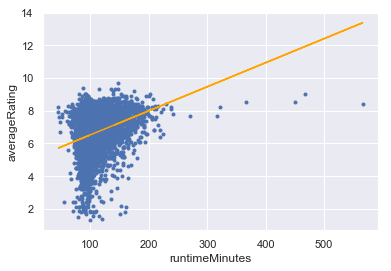

The intercept for these points is: 5.06
The slope of these points is: 0.01
The line ranges from 5.72 in 45.00 to 13.37 in 566.00 for a difference of 7.65
Pearson Correlation between runtimeMinutes and averageRating: 0.314285


In [36]:
plot_features(movies.runtimeMinutes, movies.averageRating)

There does seem to be a relationship between longer runtimes and higher ratings in our dataset. Although the vast majority of movies fall between 100 and 200 minutes, we can see that as we go from 100 to 200, the ratings get higher. Furthermore, no movie that is longer than 200 minutes has a rating below 6. The correlation coefficient of about 0.3 confirms this. It is actually the highest correlation among any 2 of our numerical features. The slope indicates that for every 1 minute increase in movie runtime, we can expect a movie to be rated about 0.015 stars higher. A possible reason is that longer movies have better developed plots.

##### runtimeMinutes and numVotes

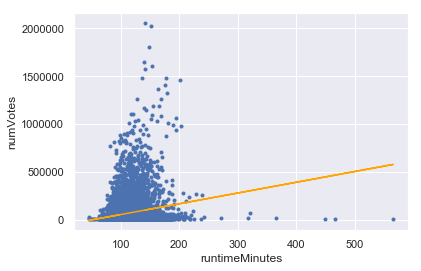

The intercept for these points is: -55,402.71
The slope of these points is: 1,120.9
The line ranges from -4,962.26 in 45.00 to 579,026.06 in 566.00 for a difference of 583,988.32
Pearson Correlation between runtimeMinutes and numVotes: 0.196031


In [37]:
plot_features(movies.runtimeMinutes, movies.numVotes)

Let's flip the axes to make it more interpretable.

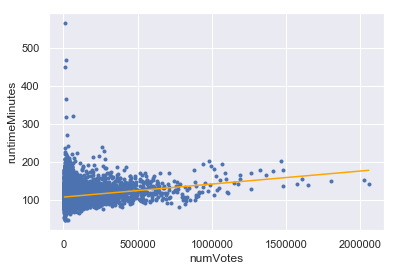

The intercept for these points is: 106.55
The slope of these points is: 0.0
The line ranges from 106.77 in 6554.00 to 177.08 in 2057323.00 for a difference of 70.31
Pearson Correlation between numVotes and runtimeMinutes: 0.196031


In [38]:
plot_features(movies.numVotes, movies.runtimeMinutes)

We see a nice relationship between these features. More votes is associated with longer runtimes. The quickest explanation is that longer runtimes are associated with higher ratings which are associated with higher votes. This is not dispositive though.

##### averageRating and numVotes

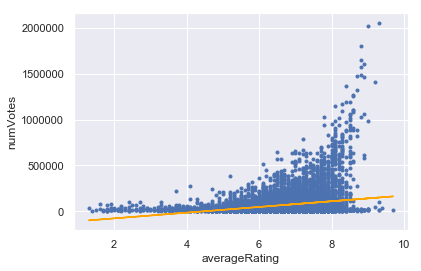

The intercept for these points is: -140,807.11
The slope of these points is: 31,160.16
The line ranges from -100,298.9 in 1.30 to 161,446.43 in 9.70 for a difference of 261,745.33
Pearson Correlation between averageRating and numVotes: 0.254650


In [39]:
plot_features(movies.averageRating, movies.numVotes)

There is a clear relationship here between ratings and votes with higher ratings being correlated with more votes and vice versa. Because the strong negative intercept is hard to interpret, let's put averageRating on the y-axis and numVotes on the x-axis.

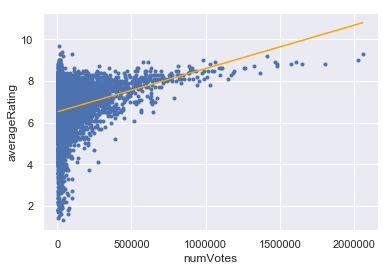

The intercept for these points is: 6.52
The slope of these points is: 0.0
The line ranges from 6.53 in 6554.00 to 10.8 in 2057323.00 for a difference of 4.27
Pearson Correlation between numVotes and averageRating: 0.254650


In [40]:
plot_features(movies.numVotes, movies.averageRating)

This looks better. The intercept of 6.52 means we can expect a movie with 0 votes to have about a 6.5 rating. We see the slope as 0 because it is very small so our rounding in the plot_features function rounds it to 0. Let's get the precise number.

In [41]:
b,m = polyfit(movies.numVotes, movies.averageRating, 1)
m

2.081081718506996e-06

So very small indeed. But the relationship between the variables is there. A natural reason for it would be that people are more inclined to watch and then rate high quality movies.

We have examined only our numeric features thus far. Let's take a look at our only categorical data: the genres column.

### Categorical Features: Genres

In [42]:
movies['genres'].value_counts()

Comedy,Drama,Romance              491
Drama                             451
Comedy,Drama                      404
Drama,Romance                     358
Comedy                            333
Comedy,Romance                    273
Action,Crime,Drama                267
Crime,Drama,Thriller              205
Adventure,Animation,Comedy        169
Action,Comedy,Crime               168
Crime,Drama,Mystery               158
Action,Crime,Thriller             146
Action,Adventure,Comedy           142
Horror                            137
Drama,Thriller                    136
Crime,Drama                       134
Horror,Thriller                   133
Horror,Mystery,Thriller           123
Action,Adventure,Sci-Fi           120
Biography,Drama,History           114
Comedy,Crime,Drama                113
Action,Adventure,Drama            106
Comedy,Crime                       99
Action,Adventure,Fantasy           95
Biography,Drama                    82
Action,Adventure,Animation         75
Biography,Cr

A quick check shows us that 'Comedy,Drama,Romance' is the most common genre. But this is obviously not exactly what we are looking for. We need to see how often each label appears **on its own**.

In [43]:
genres = movies['genres']
genres = genres.tolist()

In [44]:
from collections import Counter

genre_counter = Counter()
genre_list = list()

for genre in genres:
    genres_split = genre.split(',')
    for genre_again in genres_split:
        genre_list.append(genre_again)
        genre_counter[genre_again] += 1 

In [45]:
genre_counts = dict(genre_counter.most_common())
genre_counts

{'Drama': 5506,
 'Comedy': 3689,
 'Action': 2210,
 'Crime': 1972,
 'Romance': 1803,
 'Thriller': 1624,
 'Adventure': 1553,
 'Horror': 1226,
 'Mystery': 900,
 'Fantasy': 717,
 'Sci-Fi': 680,
 'Biography': 627,
 'Family': 512,
 'Animation': 437,
 'History': 346,
 'Music': 311,
 'War': 252,
 'Documentary': 230,
 'Sport': 220,
 'Musical': 144,
 'Western': 120,
 'Film-Noir': 61,
 'News': 3}

We see that Drama, Comedy, and Action are the most common genres among the top 10,000 movies. Let's vizualize this.

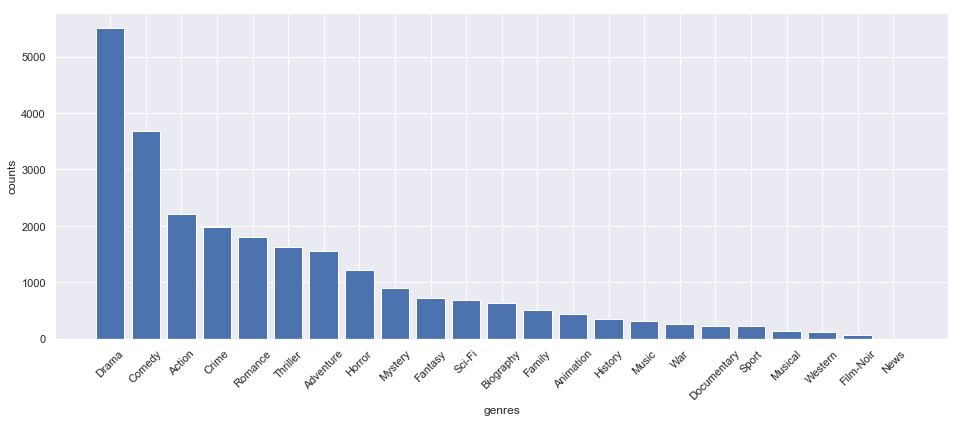

In [46]:
fig, ax = plt.subplots(1,1, figsize=(16,6))
plt.bar(genre_counts.keys(), genre_counts.values())
plt.xlabel('genres')
plt.ylabel('counts')
plt.xticks(rotation=45)
plt.show()
fig.savefig('genres1.png')

Let's do the same chart by percentages:

In [47]:
genre_sum = sum(genre_counter.values())
genre_percentages = {k: v / genre_sum for k, v in genre_counts.items()}

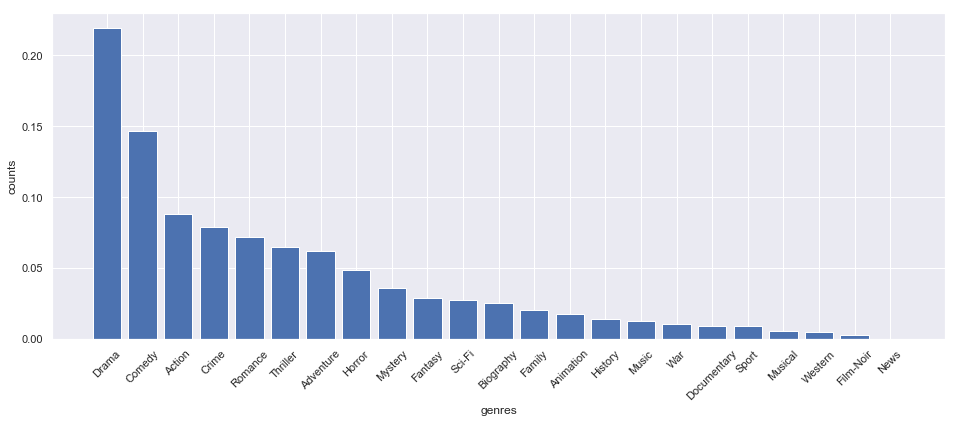

In [48]:
fig, ax = plt.subplots(1,1, figsize=(16,6))
plt.bar(genre_percentages.keys(), genre_percentages.values())
plt.xlabel('genres')
plt.ylabel('counts')
plt.xticks(rotation=45)
plt.show()

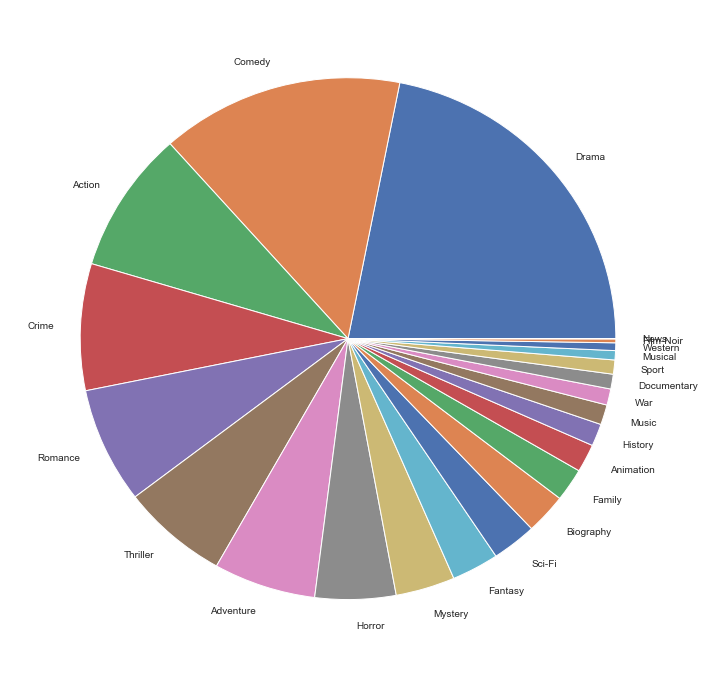

In [49]:
plt.pie(genre_percentages.values(), labels=genre_percentages.keys(), textprops={'fontsize':10})
fig = plt.gcf()
fig.set_size_inches(12,12) # or (4,4) or (5,5) or whatever
plt.show()
fig.savefig('genres2.png')
#autopct='%1.1f%%'

Moving on: Another question we might have is to what extent different genres are related to one another. Let's explore this.

In [50]:
from sklearn.feature_extraction.text import CountVectorizer # Allows us to one-hot-encode Genre category
genre_categories = list(genre_counts.keys()) # Get this list of genres
pattern = "(?u)\\b[\\w-]+\\b"  #Regex pattern to include '-' in words we search for so we can include 'Sci-Fi' and 'Film-Noir'
cv = CountVectorizer(vocabulary=genre_categories, lowercase=False, token_pattern=pattern) 
# Feed CountVectorizer the list of genres, set lowercase to False because genres are in uppercase, and give it the regex pattern

# Create our dataframe from the genres category setting default value to 0 representing the fact that that genre is not 
# associated with a given movie
genres = pd.SparseDataFrame(cv.fit_transform(movies['genres']), 
                       movies['genres'].index,
                       cv.get_feature_names(), 
                       default_fill_value=0)
genres = pd.DataFrame(genres)

In [51]:
genres.sum(axis=1).value_counts()

3    6189
2    2765
1    1046
dtype: int64

Here we see the breakdown of the number of genres associated with movies. The majority of movies fit 3 genres. More than a quarter are tagged with 2 genres and only about 10% of movies are tagged with only 1 genre. A natural question to ask is what genres appear most often together, so let's try and answer that.

First, let's plot the correlations:

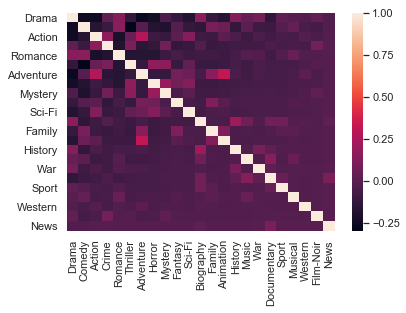

In [52]:
corr = genres.corr()
sns.heatmap(corr)
plt.show()

We see some orange amidst the dark purple, but nothing too bright. Let's look at the actual numbers for more insight.

In [53]:
corr_triu = corr.where(~np.tril(np.ones(corr.shape)).astype(np.bool))
corr_triu = corr_triu.stack()
corr_triu.name = 'Pearson Correlation Coefficient'
corr_triu.index.names = ['Genre 1', 'Genre 2']

##### What Genres are most positively correlated?

In [54]:
corr_triu[(corr_triu) > 0.2].to_frame().sort_values(by='Pearson Correlation Coefficient', ascending=False)

,,Pearson Correlation Coefficient
Genre 1,Genre 2,
Adventure,Animation,0.318
Action,Adventure,0.274
Biography,History,0.217


We see that Adventure and Animation, Action and Adventure, and Biography and History are genres that are fairly correlated with each other. These facts are unsurprising. We are using a benchmark of 0.2 to define what is significantly correlated.

##### What Genres are most negatively correlated?

In [55]:
corr_triu[(corr_triu) < -0.2].to_frame()

Pearson Correlation Coefficient
Genre 1 Genre 2                                   
Drama   Comedy                              -0.245
        Action                              -0.246
        Adventure                           -0.259
        Horror                              -0.229
Comedy  Thriller                            -0.297
Action  Romance                             -0.208

We see that Drama is negatively correlated with a bunch of other genres (Comedy, Action, Adventure and Horror). It seems like the Drama genre likes to 'hog' the movies it is tagged to, that is, it doesn't like to share tags with other movies. We  also see that Comedy and Thriller and Action and Romance are negatively correlated, which is unsurprising since those genres can be described as opposites.

Let's see if Drama is positively correlated with any other genre

In [56]:
corr['Drama'].sort_values(ascending=False)

Drama          1.000
Biography      0.158
Romance        0.148
History        0.136
War            0.085
Music          0.044
Film-Noir      0.035
Crime          0.021
Sport          0.020
Musical        0.001
News          -0.019
Western       -0.022
Mystery       -0.029
Fantasy       -0.111
Family        -0.114
Thriller      -0.122
Documentary   -0.128
Animation     -0.163
Sci-Fi        -0.172
Horror        -0.229
Comedy        -0.245
Action        -0.246
Adventure     -0.259
Name: Drama, dtype: float64

We see that Drama is positively correlated with a few other genres, but is mostly negatively correlated with other genres. Let's now look at what percentage of the time each genre appears on its own, by genre.

In [57]:
genres['number_of_genres'] = genres.sum(axis=1)

In [58]:
# Old code: The code in the next cell achieves the same result in fewer lines

# pivots = []
# for column in genres.columns[0:-1]:
#     column = pd.DataFrame(genres[column])
#     columns = column.join(genres.number_of_genres)
#     pivot = pd.pivot_table(columns, values=columns.columns[0], columns='number_of_genres', aggfunc=np.sum)
#     pivots.append(pivot)

# pivots_df = pd.concat(pivots)
# pivots_df['totals'] = pivots_df.sum(axis=1)
# pivots_df.loc['Total'] = pivots_df.sum()

In [59]:
pivots_df = genres.pivot_table(columns='number_of_genres', aggfunc='sum')
pivots_df['totals'] = pivots_df.sum(axis=1)
pivots_df.sort_values(by='totals', ascending=False, inplace=True)
pivots_df.loc['Total'] = pivots_df.sum()
pivots_df

number_of_genres,1,2,3,totals
Drama,451,1481,3574,5506
Comedy,333,1108,2248,3689
Action,9,230,1971,2210
Crime,1,284,1687,1972
Romance,1,646,1156,1803
Thriller,22,449,1153,1624
Adventure,1,98,1454,1553
Horror,137,324,765,1226
Mystery,0,108,792,900
Fantasy,1,74,642,717


We see the number of times each genre label appeared, broken down by whether the label was on its own (1), with another label (2) or with 2 other labels (3). We are more interested in seeing the percentage of times that a genre label was on its own, so let's find that. To be clear, what we are finding now is the percentage occurence for a label appearing on its own, with another label or with 2 other labels when we know that genre label is applied. That is, the denominator would be the 'totals' column in pivots_df

In [60]:
percentages_by_genre = pivots_df.loc[:,[1,2,3]].div(pivots_df['totals'], axis=0)
percentages_by_genre = percentages_by_genre * 100
#percentages_by_genre['totals'] = percentages_by_genre.sum(axis=1) # just adds a 4th column that is 100 (%) for each row
percentages_by_genre

number_of_genres,1,2,3
Drama,8.191,26.898,64.911
Comedy,9.027,30.035,60.938
Action,0.407,10.407,89.186
Crime,0.051,14.402,85.548
Romance,0.055,35.829,64.115
Thriller,1.355,27.648,70.998
Adventure,0.064,6.310,93.625
Horror,11.175,26.427,62.398
Mystery,0.000,12.000,88.000
Fantasy,0.139,10.321,89.540


In [61]:
percentages_by_genre.describe()

number_of_genres,1,2,3
count,24.000,24.000,24.000
mean,3.384,21.275,75.341
std,7.208,11.155,15.880
min,0.000,1.373,33.913
25%,0.000,11.391,64.481
50%,0.053,20.482,77.438
75%,2.056,30.860,88.507
max,30.435,36.667,98.627


Documentaries and Westerns are most likely to appear alone. By contrast, most other genre labels never or rarely appear alone. This is made clear with the describe method. The mean is about 3.4 and the 75th percentile is about 2.1, so they are pretty low.

There is nothing too special to say about the 2 column. By contrast, in the 3 column in percentages_by_genre, we see that Animation appears almost 99% of the time that its label is applied. Let's take a look there.

In [62]:
animation = genres.loc[(genres.Animation == 1), genres.columns[0:-1]]

In [63]:
(animation.sum() / animation.sum()['Animation']).sort_values(ascending=False)

Animation     1.000
Adventure     0.693
Comedy        0.503
Action        0.252
Family        0.174
Drama         0.172
Fantasy       0.080
Sci-Fi        0.032
Crime         0.025
Romance       0.014
Biography     0.011
Horror        0.009
Musical       0.007
Mystery       0.005
History       0.002
War           0.002
Thriller      0.002
Documentary   0.002
Film-Noir     0.000
Music         0.000
Sport         0.000
Western       0.000
News          0.000
dtype: float64

So we see that every time the animation label appears, about 69% of the time it is accompanied by the Adventure label. This would explain why they have the highest correlation of any 2 genres. The same approach can be used to find which genres appear most often with any given genre.

For completeness, we show a table of the percentage of times each genre appears in our dataset broken down by number of genres. So for example, movies with only the Drama label appear about 1.79% of the time in our dataset.

In [64]:
percentages_by_genre_totals = (pivots_df / genres.sum()['number_of_genres']) * 100
percentages_by_genre_totals.iloc[0:-1,:]

number_of_genres,1,2,3,totals
Drama,1.794,5.890,14.215,21.899
Comedy,1.324,4.407,8.941,14.672
Action,0.036,0.915,7.839,8.790
Crime,0.004,1.130,6.710,7.843
Romance,0.004,2.569,4.598,7.171
Thriller,0.087,1.786,4.586,6.459
Adventure,0.004,0.390,5.783,6.177
Horror,0.545,1.289,3.043,4.876
Mystery,0.000,0.430,3.150,3.580
Fantasy,0.004,0.294,2.553,2.852


### Text Features: plot, plot outlines, keywords, synopsis

NLP Fundamentals in Python:  
1. Regular Expressions and Word Tokenization
    1. Introduction to Regular Expressions
    2. Word Tokenization with NLTK
    3. Advanced tokenization with NLTK and regex
    4. Charting word lengths with NLTK
2. Simple Topic Identification
    1. Word Counts with bag-of-words
    2. Simple text preprocessing
    3. Introduction to Gensim
    4. Tf-idf with Gensim
3. Named-entity Recognition
4. Building a "fake news" classifier

Let's begin by creating a dataframe with just the columns we need.

In [65]:
text_cols = movies[['plot', 'plot outlines', 'keywords', 'synopsis']]

In [66]:
text_cols.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, tt0111161 to tt0110365
Data columns (total 4 columns):
plot             10000 non-null object
plot outlines    10000 non-null object
keywords         9877 non-null object
synopsis         6059 non-null object
dtypes: object(4)
memory usage: 710.6+ KB


Again, we note that we are missing values in the synopsis and keywords columns

To start, let's get the average length of each column by number of characters to know what we are dealing with.

In [67]:
for col in text_cols.columns:
    print("%s: %.3f" %(col,np.mean(text_cols[col].str.len())) )

plot: 177.802
plot outlines: 586.338
keywords: 1585.197
synopsis: 7080.901


We see that synopsis is by far the longest on average, followed by keywords, followed by plot outline, followed by plot. This matches our expectations since in creating the dataset we noticed that synopsis contains paragraphs describing the movie scene by scene, keywords contains may keywords describing the movie, plot outline is gerenally around a paragraph of description about the movie, and plot is generally a sentence or two.

Let's dry a different manner of getting the plot lengths.

In [68]:
all_lengths = text_cols.applymap(lambda x: len(str(x))) # get length of every string in a dataframe
all_lengths.mean()

plot             177.802
plot outlines    586.338
keywords        1565.736
synopsis        4291.500
dtype: float64

We see that when we use the applymap function we get different results, but only for the keywords and synopsis columns. My guess would be that the difference is due to the nans we have in the keywords and synopsis columns. With applymap we are converting them to strings, so they bring down the average, whereas they are not counted with the first method. To confirm this, we can replace all the NaNs with the average values for the columns. But we will not do that here because it is not that important.

At this point, we make the decision to just use plot outline and keywords in our model, at least for now. We use plot outline instead of plot because there is more information there; we use plot outline instead of synopsis because synopsis might contain too much information; and we use keywords because they might have a lot of value.

In [69]:
plots_and_keywords = text_cols[['plot outlines', 'keywords']]

Let's begin by plotting the distributions of the number of words for both plot outlines and keywords. Then we will plot the distributions of length of words for both columns.

In [70]:
import re
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize

Let's get a histogram of the number of words in every plot outline:

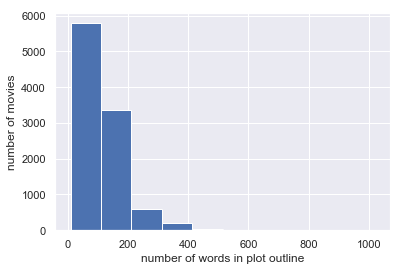

In [71]:
number_of_words = []
for plot in plots_and_keywords['plot outlines']:
    plot = word_tokenize(plot)
    number_of_words.append(len(plot))

plt.hist(number_of_words)
plt.xlabel('number of words in plot outline')
plt.ylabel('number of movies')
plt.show()

It doesn't look like too many values are above 500. Let us count how many.

In [72]:
(pd.Series(number_of_words) > 500).sum()

16

Only 16. So let's redo the histogram but with the range only extending to 500 for better clarity.

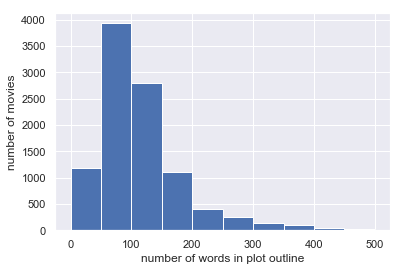

In [73]:
plt.hist(number_of_words, range=(0,500)) # doing because only 16 values are greater than 500
plt.xlabel('number of words in plot outline')
plt.ylabel('number of movies')
plt.show()

So the majority of plot outlines are between 50 and 150 words

Let's do the same analysis for keywords.

First, we need to get rid of the nans.

In [74]:
plots_and_keywords = plots_and_keywords[plots_and_keywords.keywords.notnull()]

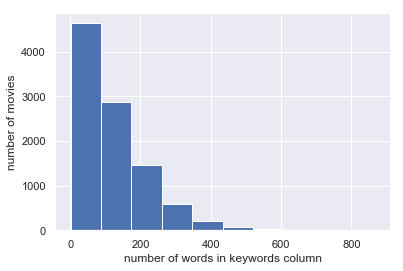

In [75]:
number_of_keywords = []
for keywords in plots_and_keywords['keywords']:
    n_keywords = len(keywords.split(','))
    number_of_keywords.append(n_keywords)

plt.hist(number_of_keywords)
plt.xlabel('number of words in keywords column')
plt.ylabel('number of movies')
plt.show()

So we see the number of keywords is slightly more than the number of words in plot outlines. 

In [76]:
max(number_of_keywords)

867

The max number of keywords is 867. Let's see how many movies have more than 600 keywords.

In [77]:
pd.Series(number_of_keywords)[pd.Series(number_of_keywords) >= 600].shape

(19,)

So only 19. Let's Change the range to a maximum of 600.

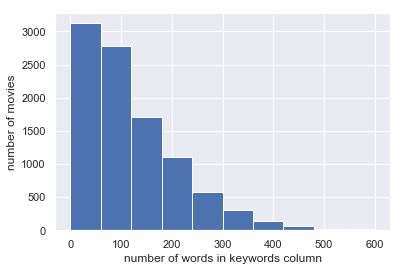

In [78]:
plt.hist(number_of_keywords, range=(0,600))
plt.xlabel('number of words in keywords column')
plt.ylabel('number of movies')
plt.show()

Let's compare the distributions for keywords and plot outlines.

In [79]:
pd.Series(number_of_keywords).describe()

count   9877.000
mean     121.934
std       98.428
min        1.000
25%       50.000
50%       95.000
75%      170.000
max      867.000
dtype: float64

In [80]:
pd.Series(number_of_words).describe()

count   10000.000
mean      114.791
std        73.099
min         9.000
25%        67.000
50%        98.000
75%       141.000
max      1020.000
dtype: float64

We see that the mean for keywords is slightly greater than the mean for words in plot outlines. This is misleading however, since most keywords tend to be compound words (e.g. "dc-comics"). This was why the number of characters for keywords is far greater than for plot outlines. Additionally, the words in keywords are more sophisticated than in plot outlines (because for one, there are no stop words among the keywords).

Now let's find the length's of words for both columns.

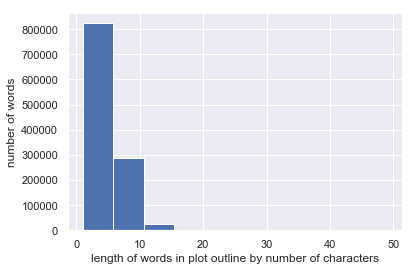

In [81]:
word_lengths = []
for plot in plots_and_keywords['plot outlines']:
    plot = word_tokenize(plot)
    for word in plot:
        word_lengths.append(len(word))

plt.hist(word_lengths)
plt.xlabel('length of words in plot outline by number of characters')
plt.ylabel('number of words')
plt.show()

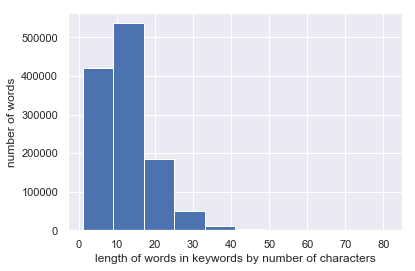

In [82]:
keyword_lengths = []
for keywords in plots_and_keywords['keywords']:
    keywords = keywords.split(',')
    for keyword in keywords:
        keyword_lengths.append(len(keyword))
        
plt.hist(keyword_lengths)
plt.xlabel('length of words in keywords by number of characters')
plt.ylabel('number of words')
plt.show()

So we see that they keywords are longer than the words in the plot outlines. Here, we recounted the same words in each column numerous times. But we can see how the keywords are longer than the words the in plot outlines. 

Moving on.

Next, let's get most the most common words for plot outlines and keywords.

Let's find the most common words for both plot outlines and keywords.

In [83]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
# Create functions for making alpha, removing stop words, and lemmatizing
def make_alpha(doc):
    # Retain alphabetic words: alpha_only
    alpha_only = [t for t in doc if t.isalpha()]    
    return(alpha_only)
def remove_stops(doc):
    no_stops = [t for t in doc if t not in stopwords.words('english')]
    return(no_stops)
def lemmatize(doc):
    wordnet_lemmatizer = WordNetLemmatizer()
    lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in doc]
    return(lemmatized)
def no_commas(doc):
    no_commas = [t for t in doc if t!=',']
    return(no_commas)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gideo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [84]:
plot_outlines = plots_and_keywords['plot outlines'].tolist()

In [85]:
# plot_outlines = [word_tokenize(outline.lower()) for outline in plot_outlines] #lowecase the words and tokenize them
# plot_outlines = [make_alpha(outline) for outline in plot_outlines] 
# plot_outlines = [remove_stops(outline) for outline in plot_outlines] 
# plot_outlines = [lemmatize(outline) for outline in plot_outlines] 

# import csv
# with open('plot_outlines.csv', 'w') as csvFile:
#     writer = csv.writer(csvFile)
#     writer.writerows(plot_outlines)
# csvFile.close()

import csv
with open('plot_outlines.csv', 'r') as f:
    reader = csv.reader(f)
    plot_outlines = list(reader)

from gensim.corpora.dictionary import Dictionary
dictionary_outlines = Dictionary(plot_outlines)
corpus = [dictionary_outlines.doc2bow(outline) for outline in plot_outlines]

# Create the defaultdict: total_word_count
# This dictionary contains every word ID and its corresponding number of times it appears in the corpus
from collections import defaultdict
import itertools
total_word_count = defaultdict(int)
for word_id, word_count in itertools.chain.from_iterable(corpus):
    total_word_count[word_id] += word_count

# Create a sorted list from the defaultdict: sorted_word_count
sorted_word_count = sorted(total_word_count.items(), key=lambda w: w[1], reverse=True)

# Print the top 20 words across all documents alongside the count
for word_id, word_count in sorted_word_count[:5]:
    print(dictionary_outlines.get(word_id), word_count)

C:\Users\gideo\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


life 3993
one 3004
find 2946
get 2461
new 2222


In [86]:
# keywords = plots_and_keywords['keywords'].tolist()
# keywords = [word_tokenize(keyword.lower()) for keyword in keywords]
# keywords = [no_commas(kw) for kw in keywords]

# import csv
# with open('keywords.csv', 'w') as csvFile:
#     writer = csv.writer(csvFile)
#     writer.writerows(keywords)
# csvFile.close()

import csv
with open('keywords.csv', 'r') as f:
    reader = csv.reader(f)
    keywords = list(reader)

from gensim.corpora.dictionary import Dictionary
dictionary_keywords = Dictionary(keywords)
corpus = [dictionary_keywords.doc2bow(keyword) for keyword in keywords]

# Create the defaultdict: total_word_count
# This dictionary contains every word ID and its corresponding number of times it appears in the corpus
from collections import defaultdict
import itertools
total_word_count = defaultdict(int)
for word_id, word_count in itertools.chain.from_iterable(corpus):
    total_word_count[word_id] += word_count

# Create a sorted list from the defaultdict: sorted_word_count
sorted_word_count = sorted(total_word_count.items(), key=lambda w: w[1], reverse=True)

# Print the top 20 words across all documents alongside the count
for word_id, word_count in sorted_word_count[:5]:
    print(dictionary_keywords.get(word_id), word_count)

murder 3455
death 3156
blood 2825
husband-wife-relationship 2724
violence 2678


We see that the words used in keywords are most complicated and descriptive than the most common words from plot outlines, which are more commonly used words.